In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
!pip install textdistance

In [3]:
import textdistance

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')

In [11]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
df.shape

(1000, 2)

In [15]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [17]:
df['Liked'].value_counts() #Spervised dataset

Liked
1    500
0    500
Name: count, dtype: int64

In [19]:
# In this contex -> 0 means negative
# 1 means Positve
df['char_count'] = df['Review'].apply(len)

In [21]:
df.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [23]:
import nltk

In [27]:
from nltk.tokenize import word_tokenize

In [39]:
df['word_count'] = df['Review'].apply(lambda x : len(str(x).split()))

In [41]:
df.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
df['sent_count'] = df['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [47]:
df.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


### Tokenization and Remove Stopwords

In [103]:
df['Review'][1]

'Crust is not good.'

In [105]:
review = re.sub('[^a-zA-Z]',' ',df['Review'][1])
review

'Crust is not good '

In [107]:
review = review.lower()
review

'crust is not good '

In [109]:
review = review.split()
review

['crust', 'is', 'not', 'good']

In [111]:
from nltk.corpus import stopwords

In [113]:
all_stopwords = set(stopwords.words('english'))
all_stopwords.remove('not')

In [115]:
review = [word for word in review if word not in all_stopwords]

In [141]:
review

['c',
 ' ',
 'r',
 ' ',
 'u',
 ' ',
 's',
 ' ',
 't',
 ' ',
 ' ',
 ' ',
 'n',
 ' ',
 'o',
 ' ',
 't',
 ' ',
 ' ',
 ' ',
 'g',
 ' ',
 'o',
 ' ',
 'o',
 ' ',
 'd']

### Stremming

In [121]:
# Stemming is the process of common root finding
# The most common stemming algorithm is PorterStemmer
from nltk.stem.porter import PorterStemmer

In [125]:
ps = PorterStemmer()

In [135]:
review = [ps.stem(word) for word in review]

In [139]:
review

['c',
 ' ',
 'r',
 ' ',
 'u',
 ' ',
 's',
 ' ',
 't',
 ' ',
 ' ',
 ' ',
 'n',
 ' ',
 'o',
 ' ',
 't',
 ' ',
 ' ',
 ' ',
 'g',
 ' ',
 'o',
 ' ',
 'o',
 ' ',
 'd']

In [145]:
custom_stopwords = { 'don', "don't", 'ain', 'aren',"aren't", 'coundn', "coundn't",
                    'didn', "didn't",'doesn', "doesn't"
}
ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - custom_stopwords

In [151]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if word not in stop_words]
    review = [ps.stem(word) for word in review]
    review = " ".join(review)
    corpus.append(review)

In [153]:
df['processed_text'] = corpus

In [155]:
df.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust good
2,Not tasty and the texture was just nasty.,0,41,8,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [157]:
# Now we see WordCloud
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500, min_font_size = 8,background_color ="white")

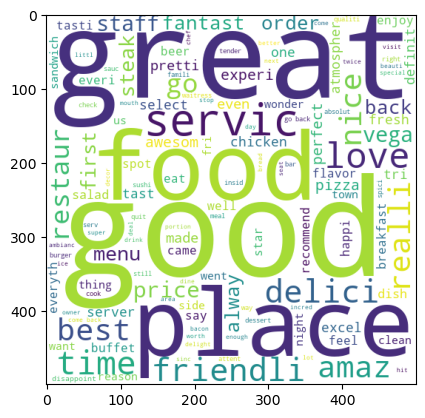

In [159]:
pos = wc.generate(df[df['Liked'] == 1]['processed_text'].str.cat(sep = " "))
plt.imshow(pos)

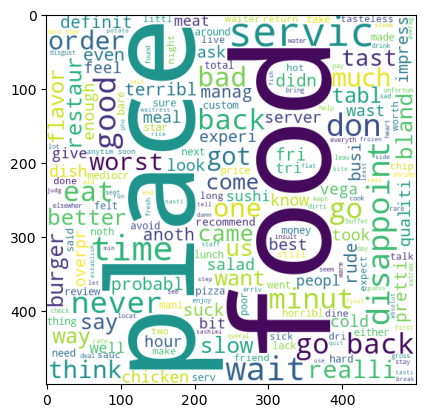

In [161]:
neg = wc.generate(df[df['Liked'] == 0]['processed_text'].str.cat(sep = " "))
plt.imshow(neg)

In [163]:
df.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust good
2,Not tasty and the texture was just nasty.,0,41,8,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [165]:
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
cv = CountVectorizer(max_features = 1500)

In [169]:
cv

CountVectorizer(max_features=1500)

In [173]:
x = cv.fit_transform(corpus)

In [194]:
x = x.toarray()

In [196]:
x.shape

(1000, 1500)

In [247]:
import joblib

In [249]:
joblib.dump(cv,"count_v_res")

['count_v_res']

In [198]:
# Now we apply machine learning algorithm
y = df['Liked']

In [181]:
from sklearn.model_selection import train_test_split

In [200]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 42)

### GaussianNB,MultinomialNB

In [188]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [190]:
gnb = GaussianNB()

In [202]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [204]:
gnb.predict(xtest)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [208]:
gnb.score(xtest,ytest)

0.67

In [210]:
mnb = MultinomialNB()

In [212]:
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [214]:
mnb.score(xtest,ytest)

0.74

In [216]:
from sklearn.linear_model import LogisticRegression

In [218]:
lr = LogisticRegression()

In [220]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [222]:
lr.score(xtest,ytest)

0.755

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
rf = RandomForestClassifier()

In [230]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [232]:
rf.score(xtest,ytest)

0.69

### Now we save this model

In [235]:
import joblib

In [237]:
joblib.dump(lr,'Restaurant_review_model')

['Restaurant_review_model']

In [239]:
import tkinter as tk
from tkinter import ttk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import re

In [256]:
class RestaurantReviewApp:
    def __init__(self, master):
        self.master = master
        master.title("Restaurant Review Classification App")
        master.geometry("400x300")  # Set a custom size for the window

        # Load your pre-trained Random Forest model and CountVectorizer
        # Replace 'your_model.pkl' and 'your_vectorizer.pkl' with the actual filenames
        self.model = joblib.load('Restaurant_review_model')
        self.vectorizer = joblib.load('count_v_res')

        # Create and set up widgets
        title_font = ('Helvetica', 16, 'bold')  # Larger font for the title
        self.label = ttk.Label(master, text="Enter your restaurant review:", font=title_font)
        self.label.pack(pady=10)

        self.text_entry = tk.Text(master, height=5, width=40)
        self.text_entry.pack(pady=10)

        # Increase button size and change color on press
        self.classify_button = ttk.Button(master, text="Classify", command=self.classify_review, style='Custom.TButton')
        self.classify_button.pack(pady=10)

        self.result_label = ttk.Label(master, text="")
        self.result_label.pack(pady=10)

        # Style configuration for the button
        self.style = ttk.Style()
        self.style.configure('Custom.TButton', font=('Helvetica', 12), width=15, foreground='black', background='#4CAF50', padding=(10, 5))
        self.style.map('Custom.TButton', foreground=[('pressed', 'black'), ('active', 'white')], background=[('pressed', '!disabled', '#45a049'), ('active', '#4CAF50')])

    def preprocess_text(self, text):
        custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                            'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                            'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                            'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
        ps = PorterStemmer()
        stop_words = set(stopwords.words("english")) - custom_stopwords

        review = re.sub('[^a-zA-Z]', ' ', text)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stop_words]
        review = " ".join(review)

        return review

    def classify_review(self):
        user_input = self.text_entry.get("1.0", "end-1c")
        if user_input:
            processed_input = self.preprocess_text(user_input)
            # Transform the processed_input using the CountVectorizer
            processed_input_vectorized = self.vectorizer.transform([processed_input])
            prediction = self.model.predict(processed_input_vectorized)[0]
            sentiment = "Positive" if prediction == 1 else "Negative"
            self.result_label.config(text=f"Predicted Sentiment: {sentiment}")
        else:
            self.result_label.config(text="Please enter a review before clicking 'Classify'.")
if __name__ == "__main__":
    root = tk.Tk()
    app = RestaurantReviewApp(root)
    root.mainloop()